In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('./kaggle/') :
    for filename in filenames :
        print(os.path.join(dirname, filename))

./kaggle/y_train.csv
./kaggle/X_train.csv
./kaggle/y_test.csv
./kaggle/X_test.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [4]:
# file read
xtrain = pd.read_csv('./kaggle/X_train.csv')
xtest = pd.read_csv('./kaggle/X_test.csv')
ytrain = pd.read_csv('./kaggle/y_train.csv')
ytest = pd.read_csv('./kaggle/y_test.csv')

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4960, 10)
(2672, 10)
(4960, 2)
(2672, 2)


In [5]:
# see sample
xtrain.head(5)

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [6]:
# train 데이터셋 하나로
df = pd.concat([xtrain, ytrain], axis = 1) # 1 왼쪽 오른쪽, 0 위 아래
df.drop(['carID'], axis = 1, inplace = True) # car id 컬럼 제거
df

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...,...,...,...
4955,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1,17999
4956,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0,28900
4957,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0,8998
4958,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0,23198


In [7]:
# test dataset 합치기
xtest = pd.concat([xtest, ytest], axis = 1)
xtest.drop(['carID'], axis = 1, inplace = True)
xtest.head(5)

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0,38000
1,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0,23495
2,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0,59999
3,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0,16713
4,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0,46000


In [8]:
# train, test 데이터셋 하나로 합쳐서 인덱스 재설정
df = pd.concat([df, xtest], axis = 0)
df.reset_index(inplace=True)

In [9]:
# 데이터셋 확인하는 함수
def describe(df) :
    columns = df.columns.to_list()
    ncol = df.describe().columns.to_list()
    ccol = []
    for i in columns :
        if(ncol.count(i) == 0) :
            ccol.append(i)
        else :
            continue
    print('DataFrame의 모든 컬럼 : ')
    print(columns)
    print('')
    print('전체 컬럼 갯수 : ')
    print(len(columns))
    print('')
    print('numerical 컬럼 목록 : ')
    print(ncol)
    print('')
    print('numerical 컬럼 갯수 : ')
    print(len(ncol))
    print('')
    print('범주형 컬럼 목록 : ')
    print(ccol)
    print('')
    print('범주형 컬럼 갯수 : ')
    print(len(ccol))
    print('')
    print('===================================================')
    print('')
    print('Null 값')
    print(df.isnull().sum())
    print('')
    print('Unique value ')
    print(df.nunique())
    print('')
    print('Basic Statistics and Measures for Numerical Columns:')
    print(df.describe().T)
    print('')
    print('Other Relevant Metadata Regarding the Dataframe:')
    print(df.info())

In [10]:
describe(df)

DataFrame의 모든 컬럼 : 
['index', 'brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'price']

전체 컬럼 갯수 : 
11

numerical 컬럼 목록 : 
['index', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

numerical 컬럼 갯수 : 
7

범주형 컬럼 목록 : 
['brand', 'model', 'transmission', 'fuelType']

범주형 컬럼 갯수 : 
4


Null 값
index           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

Unique value 
index           4960
brand              9
model             90
year              25
transmission       4
mileage         5790
fuelType           5
tax               43
mpg              128
engineSize        38
price           3032
dtype: int64

Basic Statistics and Measures for Numerical Columns:
             count          mean           std     min       25%      50%  \
index       7632.0   2078.980084   1355.983560     0.0   

[Text(0.5, 0, 'Brand Name'),
 Text(0, 0.5, 'Market Value $'),
 Text(0.5, 1.0, 'Brand vs Market value')]

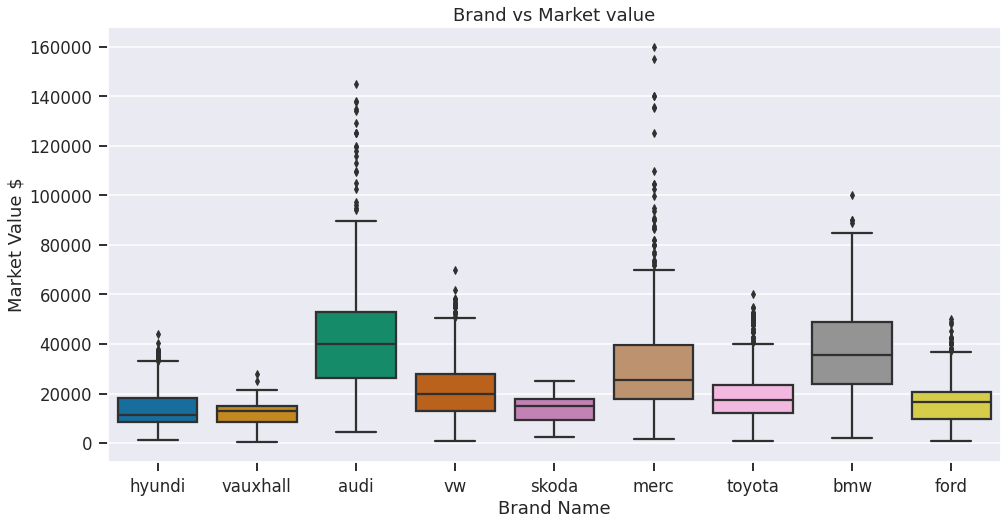

In [11]:
# brand가 price와의 영향
fig = plt.figure(figsize = (16, 8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax = sns.boxplot(y = 'price', x='brand', data = df, palette = 'colorblind')
ax.set(xlabel = 'Brand Name', ylabel = 'Market Value $', title = 'Brand vs Market value')

# seaborn을 통해 분포도가 적은 컬럼은 삭제하려고 그러는듯

In [12]:
# brand로 그룹지어서 평균 확인
df.groupby(by=['brand']).mean().sort_values(['price'], ascending = False)

,index,year,mileage,tax,mpg,engineSize,price
brand,,,,,,,
audi,2005.319312,2017.175908,21455.021033,192.294455,38.037094,3.144742,43055.277247
bmw,2085.852761,2017.297546,19342.323108,171.451943,59.539162,2.747955,38015.820041
merc,2128.024610,2016.246924,27268.958162,181.763741,45.823708,2.559557,30236.407711
vw,2059.750647,2017.012942,24324.743745,145.008628,46.719154,2.005004,21862.010354
toyota,2035.970711,2016.297071,30520.092050,133.082287,60.342120,1.990656,18778.782427
ford,2081.257525,2016.430602,26445.050167,119.991639,51.501505,1.737625,15933.644649
hyundi,2033.679315,2016.314565,29497.436965,154.326805,46.455080,1.896695,14763.489596
skoda,2080.645768,2017.528213,18095.373041,128.471787,52.202508,1.294044,13908.515674
vauxhall,2230.581818,2016.690909,22947.462338,156.415584,48.366753,1.519740,11978.981818


In [13]:
# brand를 numeric value로 변경
df.replace({'brand' : { 'audi' : 1, 'bmw' : 2, 'merc' : 3, 'vw': 4, 'toyota': 5, 'ford': 6, 'hyundi': 7, 'skoda': 8, 'vauxhall':9 }},inplace=True)

[Text(0.5, 0, 'Transmission'),
 Text(0, 0.5, 'Market Value $'),
 Text(0.5, 1.0, 'Transmission vs Market value')]

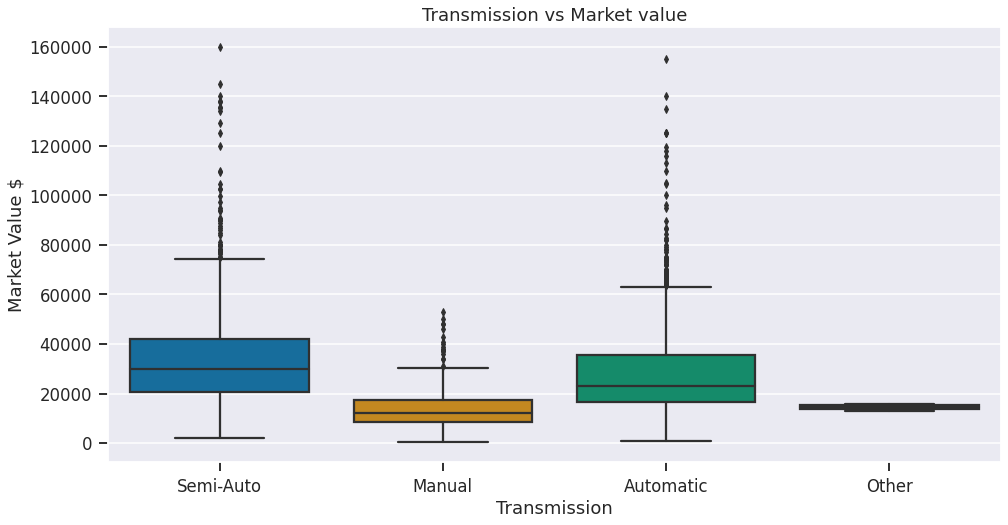

In [14]:
# transmission이 미치는 영향 확인
fig = plt.figure(figsize = (16, 8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax = sns.boxplot(y = 'price', x='transmission', data = df, palette = 'colorblind')
ax.set(xlabel = 'Transmission', ylabel = 'Market Value $', title = 'Transmission vs Market value')

In [15]:
# other는 분포가 적으므로 삭제 처리 (갯수도 두개뿐임)
df['transmission'].value_counts()

Manual       2937
Automatic    2588
Semi-Auto    2105
Other           2
Name: transmission, dtype: int64

In [16]:
df = df[df.transmission != 'Other']
df['transmission'].value_counts()

Manual       2937
Automatic    2588
Semi-Auto    2105
Name: transmission, dtype: int64

[Text(0.5, 0, 'Fuel Type'),
 Text(0, 0.5, 'Market Value $'),
 Text(0.5, 1.0, 'Fuel Type vs Market value')]

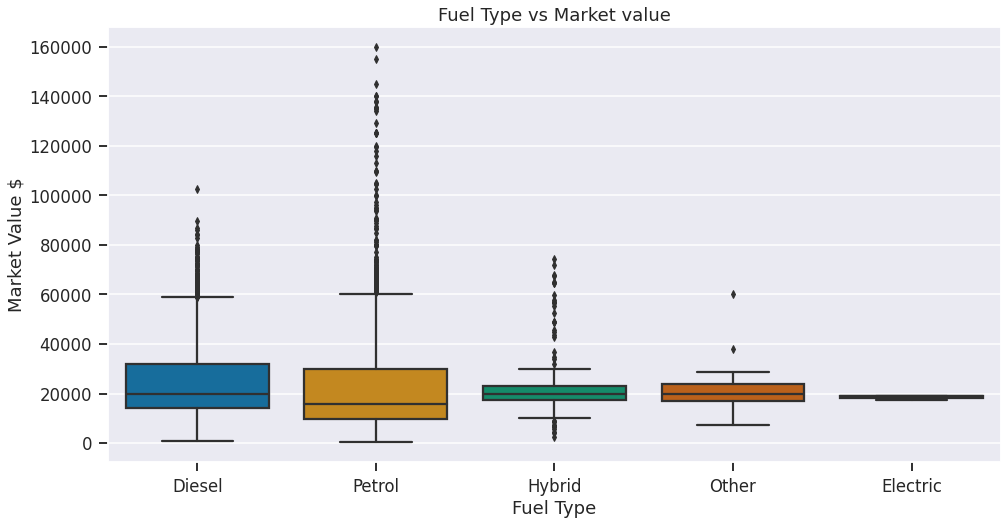

In [17]:
# fuel type과 value 영향
fig = plt.figure(figsize = (16, 8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax = sns.boxplot(y = 'price', x='fuelType', data = df, palette = 'colorblind')
ax.set(xlabel = 'Fuel Type', ylabel = 'Market Value $', title = 'Fuel Type vs Market value')

In [19]:
# 전기차 분포가 적으므로 삭제처리
df['fuelType'].value_counts()

Diesel      4650
Petrol      2654
Hybrid       287
Other         36
Electric       3
Name: fuelType, dtype: int64

In [20]:
df = df[df.fuelType != 'Electric']
df['fuelType'].value_counts()

Diesel    4650
Petrol    2654
Hybrid     287
Other       36
Name: fuelType, dtype: int64

<Figure size 576x396 with 0 Axes>

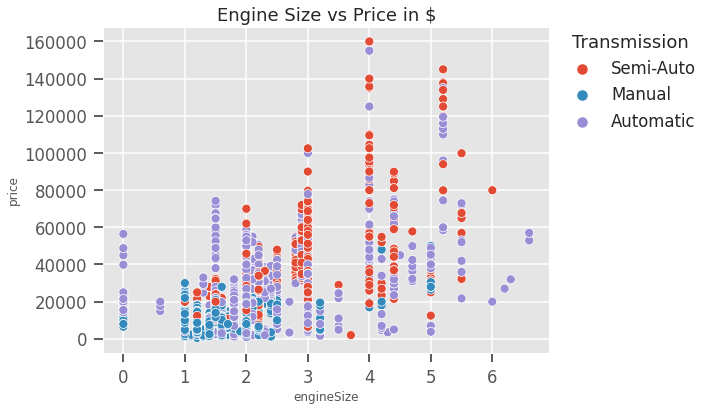

In [24]:
# 엔진 사이즈, transmission이 미치는 영향
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (8, 6))
sns.set_context('talk')
plt.title('Engine Size vs Price in $')
sns.scatterplot(x="engineSize", y="price", hue="transmission", data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Transmission')

<AxesSubplot:title={'center':'Mpg vs Price in $'}, xlabel='mpg', ylabel='price'>

<Figure size 576x396 with 0 Axes>

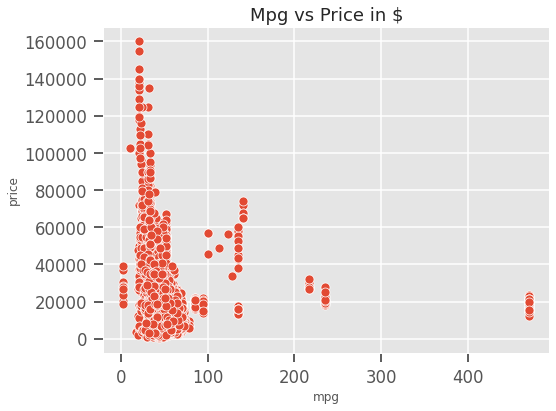

In [25]:
# mpg와 price 관계
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (8, 6))
sns.set_context('talk')
plt.title('Mpg vs Price in $')
sns.scatterplot(x="mpg", y="price", data=df)

<AxesSubplot:title={'center':'Year vs Price in $'}, xlabel='year', ylabel='price'>

<Figure size 576x396 with 0 Axes>

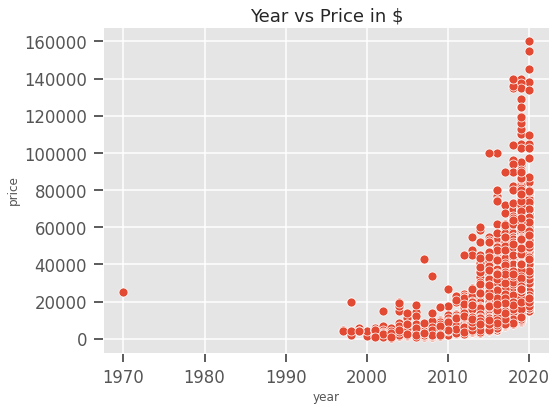

In [26]:
# year와 price 관계
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (8, 6))
sns.set_context('talk')
plt.title('Year vs Price in $')
sns.scatterplot(x="year", y="price", data=df)

<Figure size 576x396 with 0 Axes>

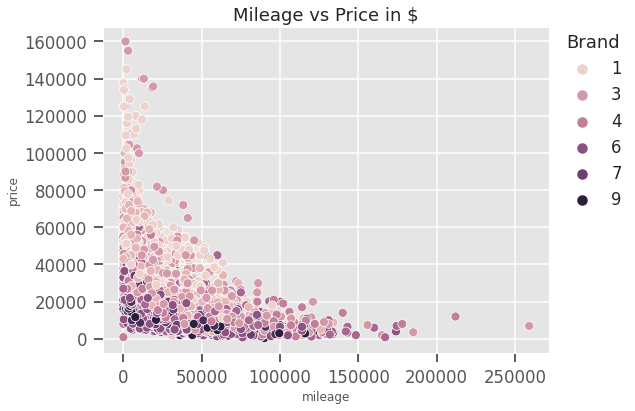

In [27]:
# mileage와 price 관계
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (8, 6))
sns.set_context('talk')
plt.title('Mileage vs Price in $')
sns.scatterplot(x="mileage", y="price", data=df, hue="brand")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Brand')

In [30]:
'''
IQR : Interquartile range, Q3 - Q1을 의미함
Q3 - Q1 : 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이
최소제한선과 최대제한선을 넘어가는 값들을 이상치라고 말함
이상치 탐색을 위해 사용함
'''
def outliers(df_column) :
    q75, q25 = np.percentile(df_column, [75, 25]) # 백분위 확인.. 인데 . 해당 컬럼의 백분위 75%와 25% 주는듯
    iqr = q75 - q25
    print('q 75 :', q75)
    print('q 25 :', q25)
    print('Inter Quartile Range : ', round(iqr, 2))
    print('Outliers lie before', q25 - 1.8 * iqr, 'and beyond', q75+1.8*iqr)
    # Usually 1.5 times IQR is considered, but we have used 1.8 for broader range since datapoints are very less
    # https://hong-yp-ml-records.tistory.com/15
    
    print('Number of Rows with Left Extreme Outliers :', len(df[df_column < q25 - 1.8 * iqr]))
    print('Number of Rows with Right Extreme Outliers : ', len(df[df_column > q75 + 1.8 * iqr]))
    plt.tight_layout()
    plt.style.use('seaborn')
    sns.set_context('notebook')
    sns.histplot(data=df, x=df_column, multiple="stack")

q 75 : 54.3
q 25 : 38.2
Inter Quartile Range :  16.1
Outliers lie before 9.220000000000013 and beyond 83.27999999999999
Number of Rows with Left Extreme Outliers : 10
Number of Rows with Right Extreme Outliers :  206


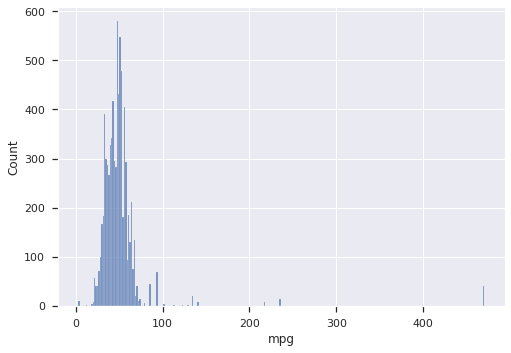

In [32]:
# 이상치가 총 216개 있다는거 같음?
outliers(df['mpg'])

q 75 : 54.3
q 25 : 38.2
Inter Quartile Range :  16.1
Outliers lie before 9.220000000000013 and beyond 83.27999999999999
Number of Rows with Left Extreme Outliers : 10
Number of Rows with Right Extreme Outliers :  166


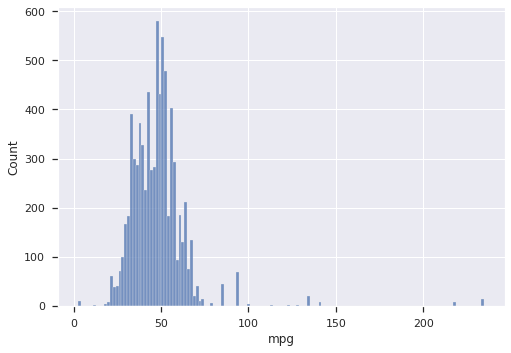

In [33]:
# mpg가 300 이하인것들만 놔두고 삭제
df = df[df.mpg < 300]
outliers(df['mpg'])

q 75 : 157.5
q 25 : 145.0
Inter Quartile Range :  12.5
Outliers lie before 122.5 and beyond 180.0
Number of Rows with Left Extreme Outliers : 1013
Number of Rows with Right Extreme Outliers :  1511


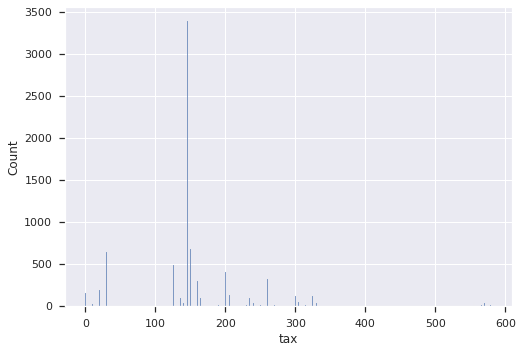

In [34]:
# tax의 iqr 확인
outliers(df['tax'])
# 처리를 안하네 .. ?

q 75 : 2.8
q 25 : 1.6
Inter Quartile Range :  1.2
Outliers lie before -0.5599999999999996 and beyond 4.959999999999999
Number of Rows with Left Extreme Outliers : 0
Number of Rows with Right Extreme Outliers :  89


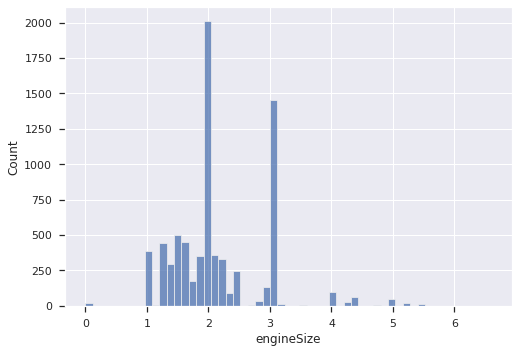

In [35]:
# enginesize iqr 확인
outliers(df['engineSize'])

In [36]:
# one hot encoding
def one(dfcolumn) :
    global df
    dfcolumn.nunique() # column의 유니크 값 갯수
    len(df.columns)
    finallencol = (dfcolumn.nunique() - 1) + (len(df.columns) - 1) # 이게 뭔지 모르겠음 .. 
    dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)  # 가변수 생성
    df = pd.concat([df, dummies], axis = 'columns')
    df.drop(columns=dfcolumn.name, axis=1, inplace=True)
    
    if(finallencol == len(df.columns)) :
        print('One Hot Encoding was successful!')
    else :
        print('Error')
    return df

In [44]:
one(df['transmission'])
one(df['fuelType'])

One Hot Encoding was successful!
One Hot Encoding was successful!


,index,brand,model,year,mileage,tax,mpg,engineSize,price,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0,7,Santa Fe,2019,4223,145.0,39.8,2.2,31995,0,1,0,0,0
1,1,9,GTC,2015,47870,125.0,60.1,2.0,7700,1,0,0,0,0
2,2,1,RS4,2019,5151,145.0,29.1,2.9,58990,0,0,0,0,1
3,3,4,Scirocco,2016,20423,30.0,57.6,2.0,12999,0,0,0,0,0
4,4,8,Scala,2020,3569,145.0,47.1,1.0,16990,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,2667,1,A7,2015,21100,325.0,29.7,4.0,28990,0,1,0,0,1
7628,2668,3,CLS Class,2015,60972,160.0,52.3,3.0,17450,0,0,0,0,0
7629,2669,6,Puma,2020,4111,145.0,50.4,1.0,21995,1,0,0,0,1
7630,2670,3,CLA Class,2016,25726,200.0,41.5,2.0,18700,0,0,0,0,1


In [45]:
# index column 제거
df.drop(['index'], axis =1, inplace=True)

In [46]:
df

,brand,model,year,mileage,tax,mpg,engineSize,price,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,7,Santa Fe,2019,4223,145.0,39.8,2.2,31995,0,1,0,0,0
1,9,GTC,2015,47870,125.0,60.1,2.0,7700,1,0,0,0,0
2,1,RS4,2019,5151,145.0,29.1,2.9,58990,0,0,0,0,1
3,4,Scirocco,2016,20423,30.0,57.6,2.0,12999,0,0,0,0,0
4,8,Scala,2020,3569,145.0,47.1,1.0,16990,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,1,A7,2015,21100,325.0,29.7,4.0,28990,0,1,0,0,1
7628,3,CLS Class,2015,60972,160.0,52.3,3.0,17450,0,0,0,0,0
7629,6,Puma,2020,4111,145.0,50.4,1.0,21995,1,0,0,0,1
7630,3,CLA Class,2016,25726,200.0,41.5,2.0,18700,0,0,0,0,1


In [54]:
# vif 확인
# vif - 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정하는 척도
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = df.copy()
vif.drop(['model', 'price'], axis = 1, inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i) for i in range(len(vif.columns))]

In [55]:
vif_data

,feature,VIF
0,brand,10.470597
1,year,76.701305
2,mileage,2.389792
3,tax,7.189007
4,mpg,21.461687
5,engineSize,20.641991
6,transmission_Manual,3.367770
7,transmission_Semi-Auto,1.993368
8,fuelType_Hybrid,1.705811
9,fuelType_Other,1.061727
